In [1]:
from copy import deepcopy
from arcgis.gis import GIS

In [2]:
gis = GIS('https://sdstate.maps.arcgis.com/','court_lusk')

Enter password: ········


<Item title:"COVID-19 Predicated Risk" type:Feature Layer Collection owner:court_lusk>
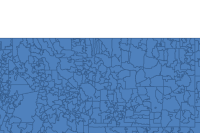

In [19]:
predictedrisk = gis.content.search('b7dbbe5ec01d4eb4a6342d1d96bd9e66')[0]
predictedrisk

In [20]:
predRisk_update = predictedrisk.layers[0]

for field in predRisk_update.properties.fields:
    print(f"{field['name']}{field['type']}")

OBJECTIDesriFieldTypeOID
ZIP_CODEesriFieldTypeString
Predicted_risk_1esriFieldTypeString
Predicted_Risk_ValueesriFieldTypeDouble
Predicted_Risk_March_8_2021esriFieldTypeDouble


In [21]:
newfield = dict(deepcopy(predRisk_update.properties.fields[1]))
newfield['name'] = "Predicted_Risk_March_8_2021"
newfield['alias'] = "Predicted_Risk_March_8_2021"
newfield['type'] = "esriFieldTypeDouble"
newfield

{'name': 'Predicted_Risk_March_8_2021', 'type': 'esriFieldTypeDouble', 'actualType': 'nvarchar', 'alias': 'Predicted_Risk_March_8_2021', 'sqlType': 'sqlTypeNVarchar', 'length': 10, 'nullable': True, 'editable': True, 'domain': None, 'defaultValue': None}

In [22]:
field_list = [newfield]
predRisk_update.manager.add_to_definition({"fields":field_list})

Exception: Unable to add feature service layer definition.
Column names in each table must be unique. Column name 'Predicted_Risk_March_8_2021' in table 'db_18122.user_18122.JB263EE1969374E358CEC2D34BF68A18F_' is specified more than once.
(Error Code: 400)

In [23]:
predictedrisk = gis.content.search('b7dbbe5ec01d4eb4a6342d1d96bd9e66')[0]
predRisk_update = predictedrisk.layers[0]

for field in predRisk_update.properties.fields:
    print(f"{field['name']}{field['type']}")

OBJECTIDesriFieldTypeOID
ZIP_CODEesriFieldTypeString
Predicted_risk_1esriFieldTypeString
Predicted_Risk_ValueesriFieldTypeDouble
Predicted_Risk_March_8_2021esriFieldTypeDouble


In [24]:
foreignKey = [f.fields.lower() for f in predRisk_update.properties.indexes if f.isUnique]

for fld in predRisk_update.properties.fields:
    if fld.name.lower() in foreignKey:
        print(f"{fld.name}{fld.type}isUnique")
    else:
        print(f"{fld.name}{fld.type}")

OBJECTIDesriFieldTypeOIDisUnique
ZIP_CODEesriFieldTypeStringisUnique
Predicted_risk_1esriFieldTypeString
Predicted_Risk_ValueesriFieldTypeDouble
Predicted_Risk_March_8_2021esriFieldTypeDouble


In [9]:
predRisk_df = predRisk_update.query(where= 'OBJECTID < 26', as_df=True)
predRisk_df[["OBJECTID", "ZIP_CODE", "Predicted_Risk_March_8_2021"]]

,OBJECTID,ZIP_CODE,Predicted_Risk_March_8_2021
0,1,00001,None
1,2,00002,None
2,3,00003,None
3,4,00004,None
4,5,00005,None
5,6,00006,None
6,7,00009,None
7,8,00010,None
8,9,00011,None
9,10,00012,None


<Item title:"Predicted_risk_march_8_2021" type:CSV owner:court_lusk>
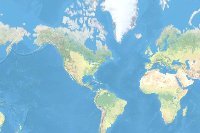

In [14]:
csv = gis.content.search('894af06d1b444214ba464076374fcd42')[0]
csv

In [15]:
source_info = gis.content.analyze(item=csv.id, file_type='csv', location_type='none')
source_info['publishParameters']

{'type': 'csv', 'name': 'data', 'useBulkInserts': True, 'sourceUrl': '', 'locationType': 'none', 'maxRecordCount': 1000, 'columnDelimiter': ',', 'qualifier': '"', 'targetSR': {'wkid': 102100, 'latestWkid': 3857}, 'editorTrackingInfo': {'enableEditorTracking': False, 'enableOwnershipAccessControl': False, 'allowOthersToQuery': True, 'allowOthersToUpdate': True, 'allowOthersToDelete': False, 'allowAnonymousToQuery': True, 'allowAnonymousToUpdate': True, 'allowAnonymousToDelete': True}, 'layerInfo': {'currentVersion': 10.81, 'id': 0, 'name': '', 'type': 'Table', 'displayField': '', 'description': '', 'copyrightText': '', 'defaultVisibility': True, 'relationships': [], 'isDataVersioned': False, 'supportsAppend': True, 'supportsCalculate': True, 'supportsASyncCalculate': True, 'supportsTruncate': False, 'supportsAttachmentsByUploadId': True, 'supportsAttachmentsResizing': True, 'supportsRollbackOnFailureParameter': True, 'supportsStatistics': True, 'supportsExceedsLimitStatistics': True, 's

In [16]:
for csv_field in source_info['publishParameters']['layerInfo']['fields']:
    print(csv_field['name'])

predicted_risk
ZIP_CODE


In [25]:
predRisk_update.append(item_id=csv.id,
                      upload_format = 'csv',
                      field_mappings = [{'name':'Predicted_Risk_March_8_2021',
                                        'source':'predicted_risk'},
                                       {'name':'ZIP_CODE','source':'ZIP_CODE'}],
                      source_info = source_info['publishParameters'],
                      upsert=True,
                      update_geometry=False,
                      append_fields=['Predicted_Risk_March_8_2021','ZIP_CODE'],
                      skip_inserts=True,
                      upsert_matching_field='ZIP_CODE')

True

In [ ]:
app_predRisk_df = predRisk_update.query(where='OBJECTID < 26', as_df=True)
app_predRisk_df[['OBJECTID', 'ZIP_CODE', 'Predicted_Risk_March_8_2021']][:25]